<a href="https://colab.research.google.com/github/BohdanShepel2005/Mashynne-Navchannya/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964_%D0%B7_%D0%9C%D0%9D_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Завантажую необхідні бібліотеки
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [5]:
# 1. Завантажую датасет Titanic
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)


Saving titanic.csv to titanic (2).csv


In [6]:
# 3. Проводжу попередній аналіз даних
print("Перші 5 рядків:")
display(df.head())

print("\nРозмір датасету:", df.shape)
print("\nТипи даних:")
print(df.dtypes)

print("\nПропущені значення:")
print(df.isnull().sum())


Перші 5 рядків:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



Розмір датасету: (418, 12)

Типи даних:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Пропущені значення:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
# 4. Заповнюю пропущені значення
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("\nПропущені значення після заповнення:")
print(df.isnull().sum())


Пропущені значення після заповнення:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


<ipython-input-7-23d2afeba8f7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-7-23d2afeba8f7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [8]:
# 5. Видаляю непотрібні стовпці
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

In [9]:

# 6. Вибираю потрібні стовпці
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [10]:
# 7. Кодування статі
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [11]:
# 8. Виконую аналіз виживання за категоріями
print("\nВідсоток виживання за статтю:")
print(df.groupby('Sex')['Survived'].mean() * 100)

print("\nВідсоток виживання за класами:")
print(df.groupby('Pclass')['Survived'].mean() * 100)

print("\nСередній вік тих, хто вижив і не вижив:")
print(df.groupby('Survived')['Age'].mean())



Відсоток виживання за статтю:
Sex
0      0.0
1    100.0
Name: Survived, dtype: float64

Відсоток виживання за класами:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

Середній вік тих, хто вижив і не вижив:
Survived
0    29.522218
1    29.734145
Name: Age, dtype: float64


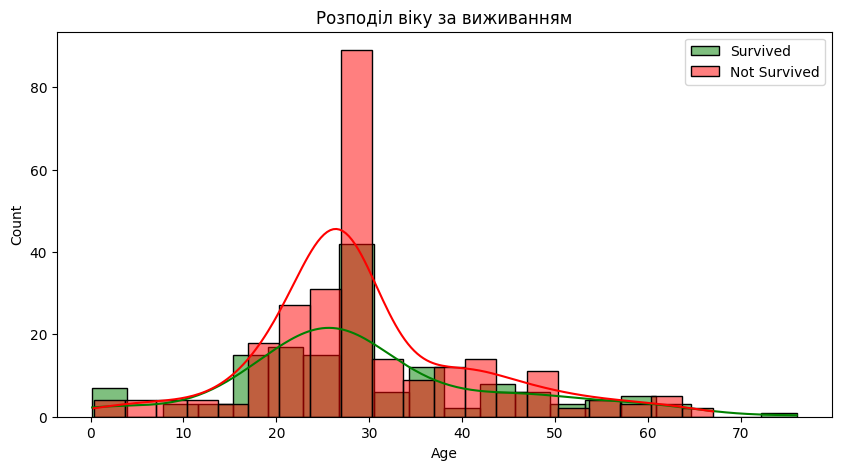

In [12]:
# 9. Візуалізація розподілу віку за виживанням
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Survived'] == 1]['Age'], color='green', label='Survived', kde=True, bins=20)
sns.histplot(df[df['Survived'] == 0]['Age'], color='red', label='Not Survived', kde=True, bins=20)
plt.legend()
plt.title('Розподіл віку за виживанням')
plt.show()



In [13]:
# 10. Формую навчальні та тестові даних
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Перевіряю на пропущені значення перед масштабуванням
print("\nПропущені значення в X_train:", X_train.isnull().sum().sum())
print("Пропущені значення в X_test:", X_test.isnull().sum().sum())
# Масштабування ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Пропущені значення в X_train: 0
Пропущені значення в X_test: 0


In [17]:
# 11. Логістична регресія
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print("\nLogistic Regression Accuracy:", log_reg_acc)
print(classification_report(y_test, log_reg_pred))



Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [18]:
# 12. Дерево рішень з підбором параметрів
tree_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
tree_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5, scoring='accuracy')
tree_clf.fit(X_train, y_train)
tree_best = tree_clf.best_estimator_
tree_pred = tree_best.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)
print("\nDecision Tree Best Parameters:", tree_clf.best_params_)
print("Decision Tree Accuracy:", tree_acc)
print(classification_report(y_test, tree_pred))


Decision Tree Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [19]:
# 13. Випадковий ліс з підбором параметрів
forest_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]}
forest_clf = GridSearchCV(RandomForestClassifier(random_state=42), forest_params, cv=5, scoring='accuracy')
forest_clf.fit(X_train, y_train)
forest_best = forest_clf.best_estimator_
forest_pred = forest_best.predict(X_test)
forest_acc = accuracy_score(y_test, forest_pred)
print("\nRandom Forest Best Parameters:", forest_clf.best_params_)
print("Random Forest Accuracy:", forest_acc)
print(classification_report(y_test, forest_pred))



Random Forest Best Parameters: {'max_depth': 3, 'n_estimators': 50}
Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [20]:
# 14. Вибираю найкращу модель
best_model = max([(log_reg, log_reg_acc), (tree_best, tree_acc), (forest_best, forest_acc)], key=lambda x: x[1])
print(f"\nНайкраща модель: {type(best_model[0]).__name__} з точністю {best_model[1]:.4f}")


Найкраща модель: LogisticRegression з точністю 1.0000


In [21]:
# 15. Прогноз для 10 випадкових пасажирів
sample_data = X_test.sample(10, random_state=42)
sample_predictions = best_model[0].predict(sample_data)
print("\nПрогноз для 10 випадків:")
print(sample_predictions)



Прогноз для 10 випадків:
[1 0 1 1 1 1 1 1 1 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [22]:
# №16: ВИСНОВКИ
print("\n№16 ВИСНОВКИ:")
print(f"""
Я завантажив датасет Titanic та провів попередній аналіз.
Заповнив пропущені значення медіаною та модою, видалив зайвий стовпець Cabin, необхідні дані залишив та закодував.
Подивився, як виживання залежить від статі, класу та віку, зробив візуалізацію.
Після цього розділив дані на навчальну та тестову вибірки, провів стандартизацію ознак.
 Побудував три моделі логістичну регресію, дерево рішень та випадковий ліс,
 для двох останніх підібрав найкращі параметри через GridSearchCV.
 Порахував точність і вибрав найкращу модель.
 Насамкінець зробив передбачення для 10 випадкових пасажирів.
""")


№16 ВИСНОВКИ:

Я завантажив датасет Titanic та провів попередній аналіз. 
Заповнив пропущені значення медіаною та модою, видалив зайвий стовпець Cabin, необхідні дані залишив та закодував. 
Подивився, як виживання залежить від статі, класу та віку, зробив візуалізацію.
Після цього розділив дані на навчальну та тестову вибірки, провів стандартизацію ознак.
 Побудував три моделі логістичну регресію, дерево рішень та випадковий ліс, 
 для двох останніх підібрав найкращі параметри через GridSearchCV. 
 Порахував точність і вибрав найкращу модель. 
 Насамкінець зробив передбачення для 10 випадкових пасажирів.

